# **Digital Model Elevation**

In [1]:
# pip
import os
import os.path as op
import sys

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cmocean

# cartopy shapereader
import contextily as ctx

# dev
sys.path.insert(0, op.join(os.getcwd(), '..', '..'))

from lib.config import *

In [2]:
# data folder 
p_data = op.abspath(op.join(os.getcwd(), '..', 'data', 'lisflood', 'config', 'DEM.nc'))
raster = xr.open_dataset(p_data)

## **Visualization: Complete Domain**

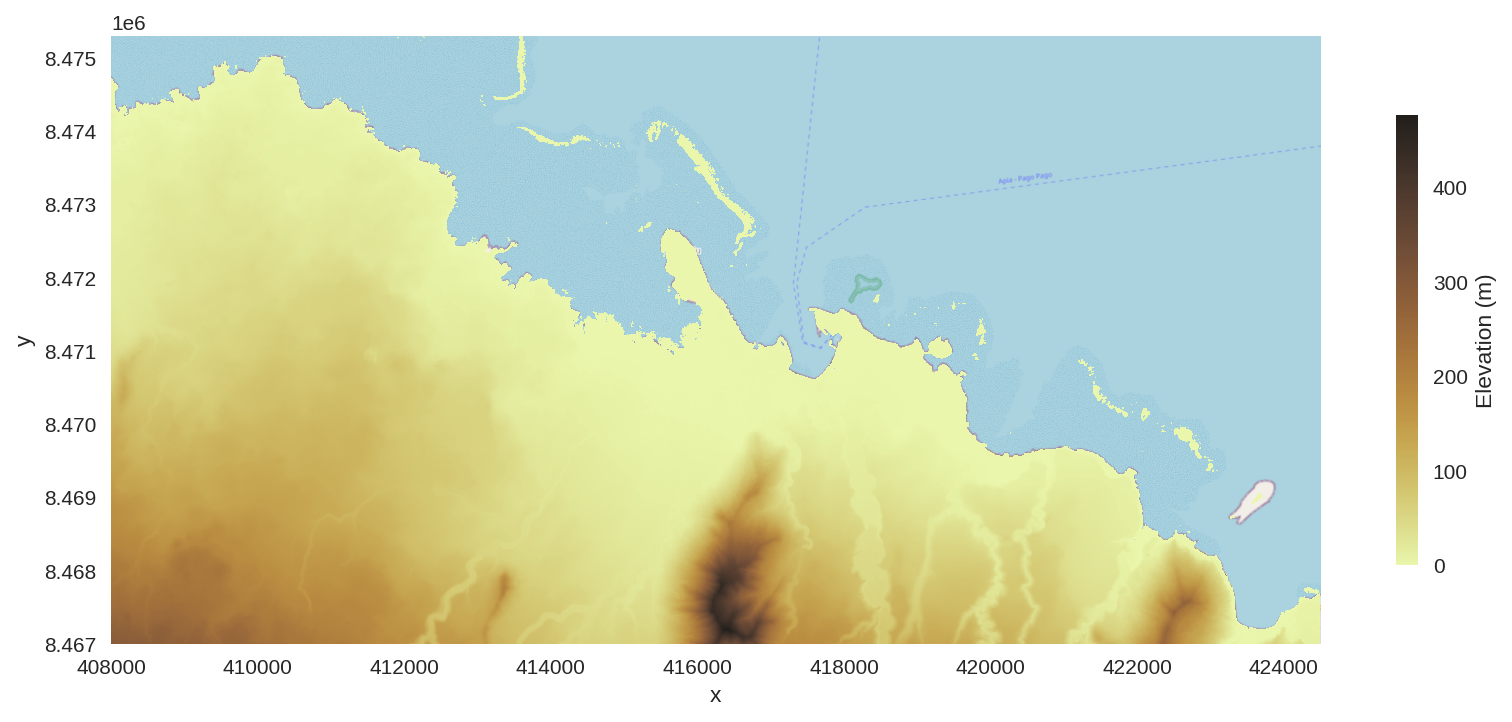

In [3]:
fig, ax = plt.subplots(1, figsize=(13, 13))
ax.axis(extend_upolu)
im = raster['z'].plot(ax=ax, add_colorbar=False, cmap=cmocean.cm.turbid, zorder=5)
ctx.add_basemap(ax, crs='epsg:32702', source=ctx.providers.OpenStreetMap.Mapnik, attribution=False)
fig.colorbar(im, shrink=0.3,  label='Elevation (m)')
plt.show()


## **Visualization: Topography bellow level *Z***

In [4]:
Z = 20 # meters of maximun elevation to plot

In [5]:
raster_b20 = raster.copy()
raster_b20['z'].values = np.where(raster_b20['z'] > 20, np.nan, raster_b20['z'])

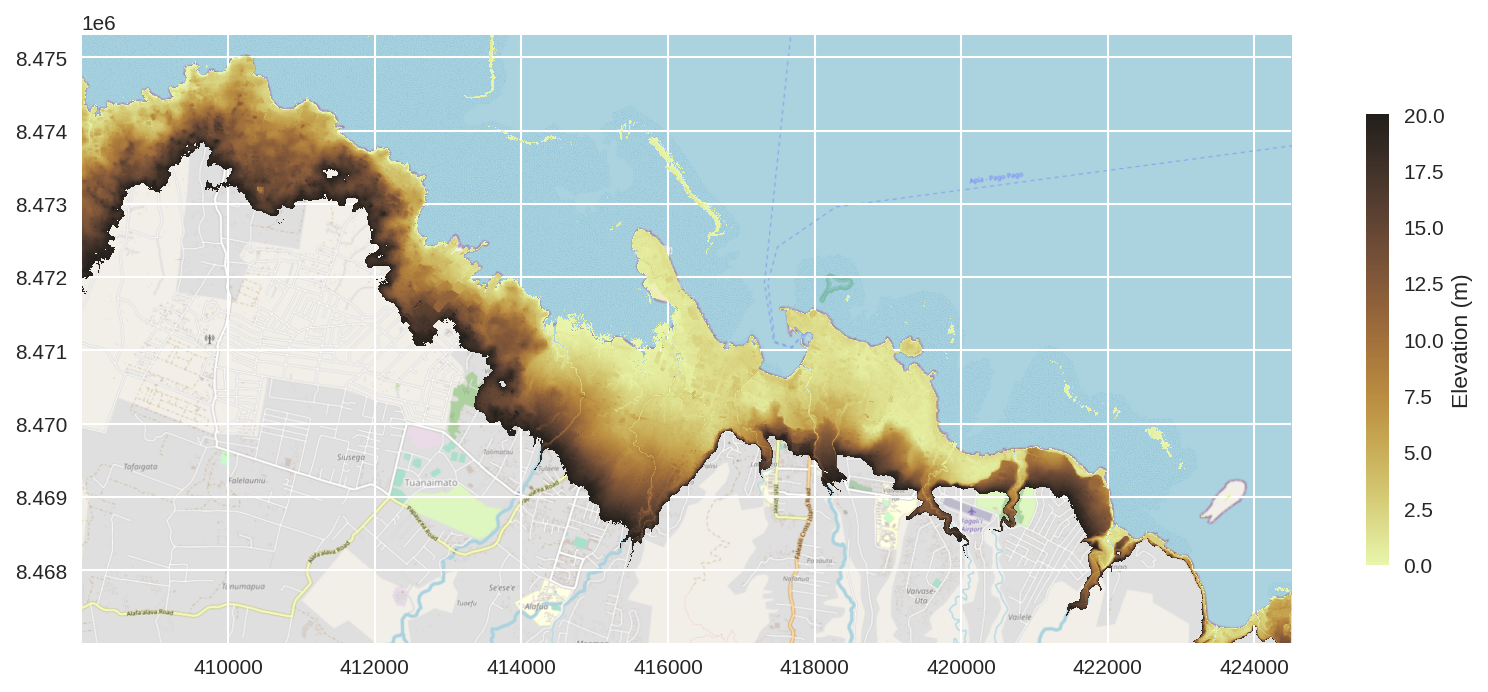

In [6]:
fig, ax = plt.subplots(1, figsize=(13, 13))
#ax.axis(extend_upolu)
im = ax.pcolorfast(raster_b20.x, raster_b20.y, raster_b20.z, cmap=cmocean.cm.turbid, zorder=5)
ctx.add_basemap(ax, crs='epsg:32702', source=ctx.providers.OpenStreetMap.Mapnik, attribution=False)
fig.colorbar(im, shrink=0.3,  label='Elevation (m)')
plt.show()
